In [1]:
## Standard :

# Name imports :
import os
import gc
import copy
import sklearn
import itertools

# Aliased imports :
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sb

# Full imports :
from plotnine import *

In [2]:
def time_indexed_df(df1: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """ Take a return a time-indexed dataframe.
    df1 paramater should contain a column called 'dateTime',
    which contains entries of type pandas._libs.tslibs.timestamps.Timestamp
    """
    _tmp = copy.deepcopy(df1)
    _tmp.index = df1.dateTime
    _tmp.drop('dateTime', axis=1, inplace=True)
    _tmp = _tmp.sort_index()
    gc.collect()
    return _tmp

In [3]:
raw = pd.read_csv('data/carelink.csv')

/home/gml/anaconda3/envs/DiabManager/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
x = raw['ISIG Value']

In [22]:
dir(x)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

In [4]:
raw.columns

Index(['Index', 'Date', 'Time', 'New Device Time', 'BG Reading (mg/dL)',
       'Linked BG Meter ID', 'Basal Rate (U/h)', 'Temp Basal Amount',
       'Temp Basal Type', 'Temp Basal Duration (h:mm:ss)', 'Bolus Type',
       'Bolus Volume Selected (U)', 'Bolus Volume Delivered (U)',
       'Bolus Duration (h:mm:ss)', 'Prime Type', 'Prime Volume Delivered (U)',
       'Alarm', 'Suspend', 'Rewind', 'BWZ Estimate (U)',
       'BWZ Target High BG (mg/dL)', 'BWZ Target Low BG (mg/dL)',
       'BWZ Carb Ratio (g/U)', 'BWZ Insulin Sensitivity (mg/dL/U)',
       'BWZ Carb Input (grams)', 'BWZ BG Input (mg/dL)',
       'BWZ Correction Estimate (U)', 'BWZ Food Estimate (U)',
       'BWZ Active Insulin (U)', 'Sensor Calibration BG (mg/dL)',
       'Sensor Glucose (mg/dL)', 'ISIG Value', 'Event Marker', 'Bolus Number',
       'Bolus Cancellation Reason', 'BWZ Unabsorbed Insulin Total (U)',
       'Final Bolus Estimate', 'Scroll Step Size', 'Insulin Action Curve Time',
       'Sensor Calibration Reje

In [54]:
#raw['Bolus Source'].value_counts()
#raw['Bolus Number'].value_counts()
len(raw['dateTime'])

96132

In [55]:
len(list(
    filter(lambda x: True if ':' in x else False, raw['dateTime'] )
))

96130

In [56]:
list(
    filter(lambda x: False if ':' in x else True, raw['dateTime'] )
)

['MiniMed 640G MMT-1512/1712 Sensor', 'Date Time']

In [57]:
for row in filter(lambda x: False if ':' in x else True, raw['dateTime'] ):
    raw = raw[raw.dateTime != row]

In [58]:
list(map(pd.to_datetime, raw.dateTime))

[Timestamp('2019-04-23 17:00:00'),
 Timestamp('2019-04-23 17:00:00'),
 Timestamp('2019-04-23 16:28:40'),
 Timestamp('2019-04-23 16:27:50'),
 Timestamp('2019-04-23 16:27:49'),
 Timestamp('2019-04-23 16:27:49'),
 Timestamp('2019-04-23 16:27:49'),
 Timestamp('2019-04-23 16:18:58'),
 Timestamp('2019-04-23 16:06:43'),
 Timestamp('2019-04-23 16:00:00'),
 Timestamp('2019-04-23 16:00:00'),
 Timestamp('2019-04-23 15:03:00'),
 Timestamp('2019-04-23 15:00:00'),
 Timestamp('2019-04-23 15:00:00'),
 Timestamp('2019-04-23 14:26:28'),
 Timestamp('2019-04-23 14:16:38'),
 Timestamp('2019-04-23 14:14:49'),
 Timestamp('2019-04-23 14:14:49'),
 Timestamp('2019-04-23 14:14:49'),
 Timestamp('2019-04-23 14:14:49'),
 Timestamp('2019-04-23 14:01:40'),
 Timestamp('2019-04-23 14:00:00'),
 Timestamp('2019-04-23 14:00:00'),
 Timestamp('2019-04-23 13:08:22'),
 Timestamp('2019-04-23 13:05:22'),
 Timestamp('2019-04-23 13:04:16'),
 Timestamp('2019-04-23 13:04:15'),
 Timestamp('2019-04-23 13:04:15'),
 Timestamp('2019-04-

In [59]:
raw.dateTime = raw.dateTime.apply(pd.to_datetime)

0       2019-04-23 17:00:00
1       2019-04-23 17:00:00
2       2019-04-23 16:28:40
3       2019-04-23 16:27:50
4       2019-04-23 16:27:49
5       2019-04-23 16:27:49
6       2019-04-23 16:27:49
7       2019-04-23 16:18:58
8       2019-04-23 16:06:43
9       2019-04-23 16:00:00
10      2019-04-23 16:00:00
11      2019-04-23 15:03:00
12      2019-04-23 15:00:00
13      2019-04-23 15:00:00
14      2019-04-23 14:26:28
15      2019-04-23 14:16:38
16      2019-04-23 14:14:49
17      2019-04-23 14:14:49
18      2019-04-23 14:14:49
19      2019-04-23 14:14:49
20      2019-04-23 14:01:40
21      2019-04-23 14:00:00
22      2019-04-23 14:00:00
23      2019-04-23 13:08:22
24      2019-04-23 13:05:22
25      2019-04-23 13:04:16
26      2019-04-23 13:04:15
27      2019-04-23 13:04:15
28      2019-04-23 13:01:34
29      2019-04-23 13:00:00
                ...        
96102   2019-01-20 00:00:00
96103   2019-01-20 00:00:00
96104   2019-01-19 00:00:00
96105   2019-01-19 00:00:00
96106   2019-01-18 0

'2019/04/23 16:00:00'

In [46]:
undesired_columns = [
    'Scroll Step Size'
    'Sensor Calibration Rejected Reason'
    'Network Device Associated Reason',
    'Network Device Disassociated Reason',
    'Network Device Disconnected Reason',
    'Sensor Exception',
    'Preset Temp Basal Name',
    'Preset Bolus', 
    'Bolus Source'
]

In [8]:
for date, time, i in zip(raw['Date'], raw['Time'], range(4)):
    print(date + ' ' +time)

2019/04/23 17:00:00
2019/04/23 17:00:00
2019/04/23 16:28:40
2019/04/23 16:27:50


In [47]:
raw['dateTime'] = raw['Date'] + ' ' +raw['Time']

In [51]:
with open('dateTime.txt', 'w') as f:
    for i in raw['dateTime']:
        f.write(f'{i}\n')

In [11]:
raw.index, raw['Index']

(RangeIndex(start=0, stop=96132, step=1), 0         0.00000
 1         1.00000
 2         2.00000
 3         3.00000
 4         4.00000
 5         5.00000
 6         6.00000
 7         7.00000
 8         8.00000
 9         9.00000
 10       10.00000
 11       11.00000
 12       12.00000
 13       13.00000
 14       14.00000
 15       15.00000
 16       16.00000
 17       17.00000
 18       18.00000
 19       19.00000
 20       20.00000
 21       21.00000
 22       22.00000
 23       23.00000
 24       24.00000
 25       25.00000
 26       26.00000
 27       27.00000
 28       28.00000
 29       29.00000
            ...   
 96102       96100
 96103       96101
 96104       96102
 96105       96103
 96106       96104
 96107       96105
 96108       96106
 96109       96107
 96110       96108
 96111       96109
 96112       96110
 96113       96111
 96114       96112
 96115       96113
 96116       96114
 96117       96115
 96118       96116
 96119       96117
 96120       96118
 96121   

In [10]:
raw['New Device Time'].count()

11

In [19]:
raw[ raw['New Device Time'].notnull() ]['New Device Time']

273      2019/04/20 19:45:26
274      2019/04/20 19:45:26
837      2019/04/16 09:15:48
838      2019/04/16 09:15:48
2633     2019/04/01 12:06:12
2634     2019/04/01 12:06:12
3684     2019/03/23 11:03:58
3685     2019/03/23 11:03:58
12864    2019/01/05 12:42:13
12865             NG1478694H
12866        New Device Time
Name: New Device Time, dtype: object

In [31]:
list(
    map(
        type, list(raw[ raw['Sensor Glucose (mg/dL)'].notnull() ]['Sensor Glucose (mg/dL)'])
    )
)

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str

In [33]:
glucosas = raw[ raw['Sensor Glucose (mg/dL)'].notnull() ]['Sensor Glucose (mg/dL)']

In [41]:
glucosas = pd.to_numeric(glucosas, 'coerce')

In [70]:
'''
glucosas = filter(lambda x: x if not np.isnan(x) else False,
                  list(
                    map(int, glucosas)
                    )
            )
Value error: cannot convert float NaN to integer
'''    

'\nglucosas = filter(lambda x: x if not np.isnan(x) else False,\n                  list(\n                    map(int, glucosas)\n                    )\n            )\nValue error: cannot convert float NaN to integer\n'

In [50]:
glucosas = glucosas[glucosas == glucosas // 1]

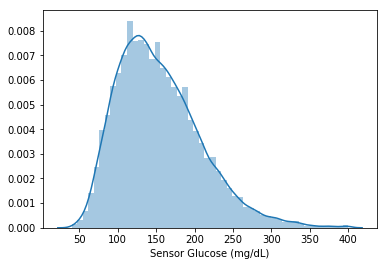

In [51]:
sb.distplot(glucosas)

In [79]:
sb.

IndexError: Inconsistent shape between the condition and the input (got (79322, 1) and (79322,))

In [65]:
proporciones = { 
    'hypo':  100 * glucosas[glucosas < 70].count() / glucosas.count(),
    'normo': 100 * glucosas[(glucosas >= 70) & (glucosas <=180)].count() / glucosas.count(),
    'hyper': 100 * glucosas[glucosas > 180].count() / glucosas.count()
}

In [66]:
proporciones

{'hypo': 2.0057487204054363,
 'normo': 69.6212904364489,
 'hyper': 28.37296084314566}

In [69]:
glucosas.mean(), glucosas.std()

(154.36552280577897, 55.004304897107545)

In [77]:
raw['BWZ Estimate (U)'].count()/90

7.622222222222222

In [76]:
raw.iloc[0,:], raw.iloc[len(raw.index)-1, :]

(Index                                     0.00000
 Date                                   2019/04/23
 Time                                     17:00:00
 New Device Time                               NaN
 BG Reading (mg/dL)                            NaN
 Linked BG Meter ID                            NaN
 Basal Rate (U/h)                             0.78
 Temp Basal Amount                             NaN
 Temp Basal Type                               NaN
 Temp Basal Duration (h:mm:ss)                 NaN
 Bolus Type                                    NaN
 Bolus Volume Selected (U)                     NaN
 Bolus Volume Delivered (U)                    NaN
 Bolus Duration (h:mm:ss)                      NaN
 Prime Type                                    NaN
 Prime Volume Delivered (U)                    NaN
 Alarm                                         NaN
 Suspend                                       NaN
 Rewind                                        NaN
 BWZ Estimate (U)              

In [29]:
x = pd.core.frame.DataFrame()

Help on method combine in module pandas.core.frame:

combine(other, func, fill_value=None, overwrite=True) method of pandas.core.frame.DataFrame instance
    Perform column-wise combine with another DataFrame based on a
    passed function.
    
    Combines a DataFrame with `other` DataFrame using `func`
    to element-wise combine columns. The row and column indexes of the
    resulting DataFrame will be the union of the two.
    
    Parameters
    ----------
    other : DataFrame
        The DataFrame to merge column-wise.
    func : function
        Function that takes two series as inputs and return a Series or a
        scalar. Used to merge the two dataframes column by columns.
    fill_value : scalar value, default None
        The value to fill NaNs with prior to passing any column to the
        merge func.
    overwrite : boolean, default True
        If True, columns in `self` that do not exist in `other` will be
        overwritten with NaNs.
    
    Returns
    -------
